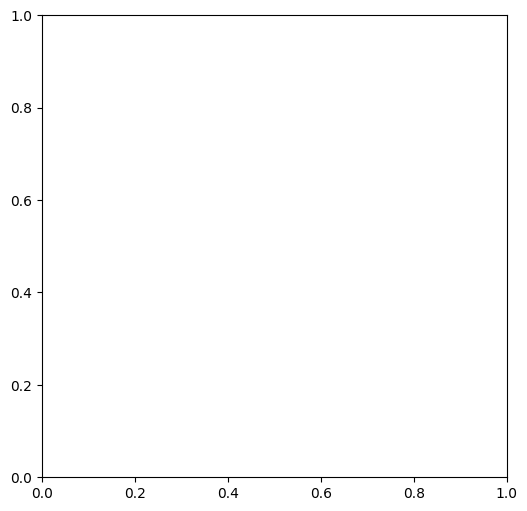

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from src.view.soup import MolecularSoup
from src.controller.ga import GeneticAlgorithm, GAConfig
from src.model.molecule import Molecule
from src.model.population import Population
from src.model.fitness import compute_fitness

# Initial population
initial = [Molecule("[C][O]"), Molecule("[C][C]"), Molecule("[O][C]")]
pop = Population(initial)

# Small GA
cfg = GAConfig(mu=3, lam=5, mutation_rate=0.5, crossover_rate=0.5)
ga = GeneticAlgorithm(cfg, compute_fitness)

# Soup
soup = MolecularSoup(pop)

fig, ax = plt.subplots(figsize=(6,6))

def update(frame):
    global pop
    if frame % 20 == 0:  # every 20 frames = 1 generation
        pop = ga.evolve_one_generation(pop)
        soup.update_population(pop)

    soup.step_motion()
    soup.draw(ax)

ani = FuncAnimation(fig, update, frames=200, interval=100)
plt.show()